In [ ]:
!pip install -q imbalanced-learn scikit-learn pandas matplotlib seaborn tensorflow


In [ ]:
!pip install tensorflow scikit-learn pandas matplotlib seaborn

In [ ]:
# General-purpose libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for ML and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score
)

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# TensorFlow / Keras for deep learning
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load Dataset
df = pd.read_csv('/content/clean_Tweets.csv')
df['text'] = df['text'].astype(str)
y = df['airline_sentiment']
classes = sorted(y.unique())
df.head()

,text,airline_sentiment
0,['said'],neutral
1,"['plus', 'added', 'commercial', 'experience', ...",positive
2,"['today', 'must', 'mean', 'need', 'take', 'ano...",neutral
3,"['really', 'aggressive', 'blast', 'obnoxious',...",negative
4,"['really', 'big', 'bad', 'thing']",negative


In [ ]:
# TF-IDF for ML models
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['text'])

In [ ]:
# Balance the dataset using SMOTE
X_resampled, y_resampled = SMOTE(random_state=70).fit_resample(X_tfidf, y)

In [ ]:
# Split for ML
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=70, stratify=y_resampled)


Logistic Regression
Training Accuracy: 0.8606
Training Weighted Precision: 0.8649
Training Weighted Recall: 0.8606
Training Weighted F1 Score: 0.8613
Test Accuracy: 0.8264
Test Weighted Precision: 0.8324
Test Weighted Recall: 0.8264
Test Weighted F1 Score: 0.8273

Train Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7264
     neutral       0.79      0.88      0.83      7264
    positive       0.90      0.82      0.86      7264

    accuracy                           0.86     21792
   macro avg       0.86      0.86      0.86     21792
weighted avg       0.86      0.86      0.86     21792

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1816
     neutral       0.75      0.86      0.80      1816
    positive       0.86      0.80      0.83      1816

    accuracy                           0.83      5448
   macro avg       0.83 

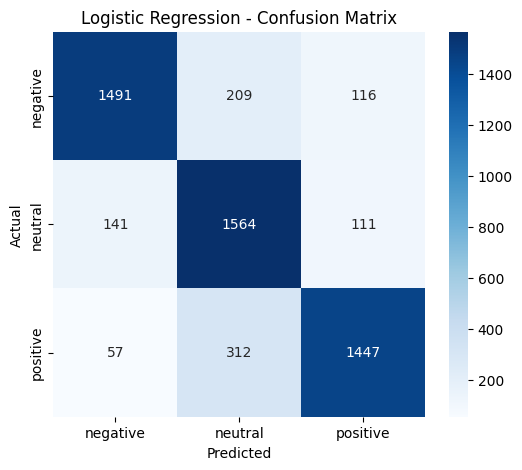

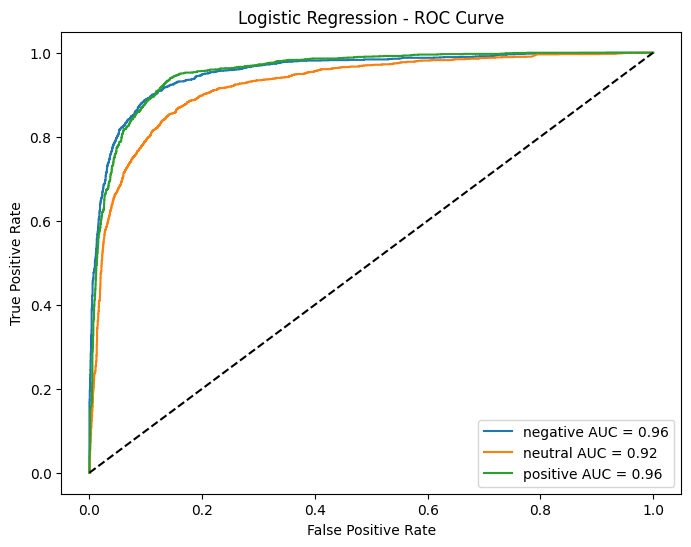


Naive Bayes
Training Accuracy: 0.8319
Training Weighted Precision: 0.8327
Training Weighted Recall: 0.8319
Training Weighted F1 Score: 0.8305
Test Accuracy: 0.8019
Test Weighted Precision: 0.8025
Test Weighted Recall: 0.8019
Test Weighted F1 Score: 0.8002

Train Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.87      0.83      7264
     neutral       0.84      0.73      0.78      7264
    positive       0.86      0.90      0.88      7264

    accuracy                           0.83     21792
   macro avg       0.83      0.83      0.83     21792
weighted avg       0.83      0.83      0.83     21792

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.84      0.80      1816
     neutral       0.80      0.69      0.74      1816
    positive       0.84      0.87      0.85      1816

    accuracy                           0.80      5448
   macro avg       0.80      0.8

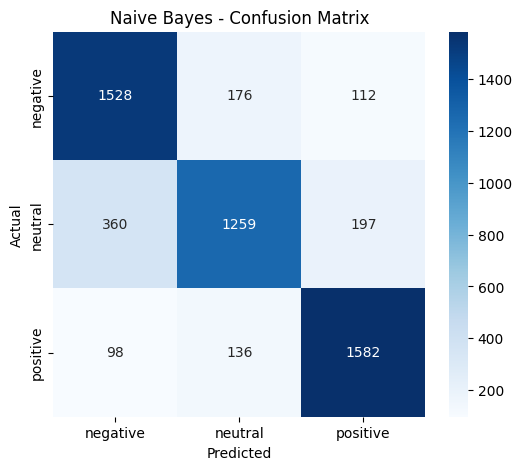

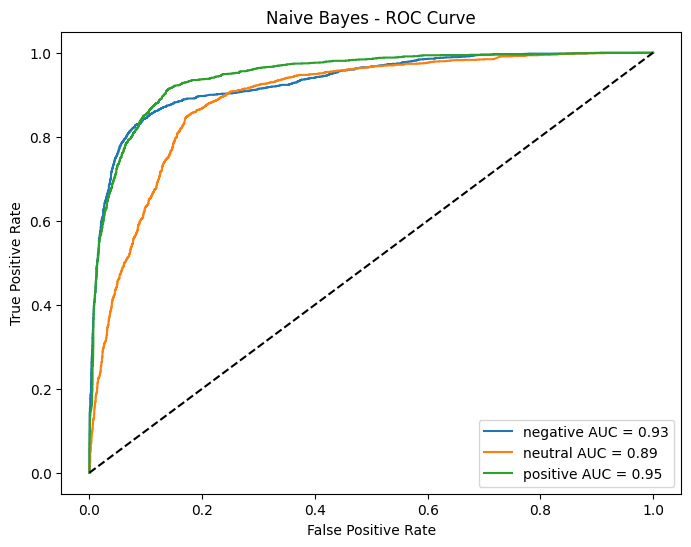


Random Forest
Training Accuracy: 0.8607
Training Weighted Precision: 0.8739
Training Weighted Recall: 0.8607
Training Weighted F1 Score: 0.8626
Test Accuracy: 0.8051
Test Weighted Precision: 0.8122
Test Weighted Recall: 0.8051
Test Weighted F1 Score: 0.8063

Train Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.83      0.88      7264
     neutral       0.75      0.92      0.83      7264
    positive       0.93      0.84      0.88      7264

    accuracy                           0.86     21792
   macro avg       0.87      0.86      0.86     21792
weighted avg       0.87      0.86      0.86     21792

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.77      0.81      1816
     neutral       0.72      0.84      0.77      1816
    positive       0.86      0.81      0.83      1816

    accuracy                           0.81      5448
   macro avg       0.81      0

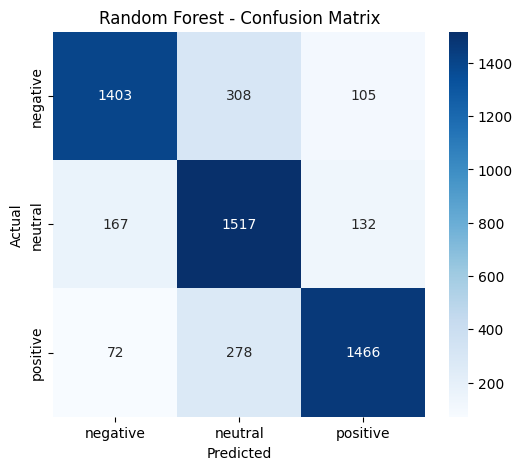

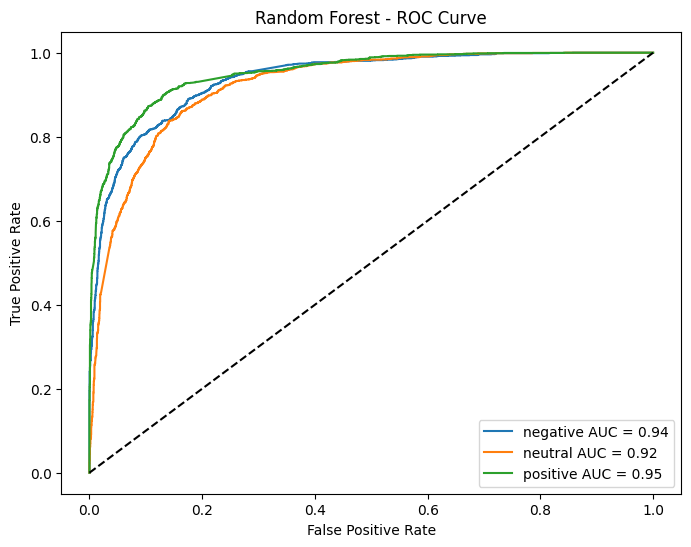

In [ ]:
# Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Naive Bayes": MultinomialNB(),
    "Random Forest":RandomForestClassifier(n_estimators=200, max_depth=37, class_weight='balanced')
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_ml, y_train_ml)

    # Predictions
    train_pred = model.predict(X_train_ml)
    test_pred = model.predict(X_test_ml)
    test_proba = model.predict_proba(X_test_ml)

    # Calculate metrics for train
    train_acc = accuracy_score(y_train_ml, train_pred)
    train_precision = precision_score(y_train_ml, train_pred, average='weighted')
    train_recall = recall_score(y_train_ml, train_pred, average='weighted')
    train_f1 = f1_score(y_train_ml, train_pred, average='weighted')

    # Calculate metrics for test
    test_acc = accuracy_score(y_test_ml, test_pred)
    test_precision = precision_score(y_test_ml, test_pred, average='weighted')
    test_recall = recall_score(y_test_ml, test_pred, average='weighted')
    test_f1 = f1_score(y_test_ml, test_pred, average='weighted')

    # Print metrics
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Training Weighted Precision: {train_precision:.4f}")
    print(f"Training Weighted Recall: {train_recall:.4f}")
    print(f"Training Weighted F1 Score: {train_f1:.4f}")

    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Weighted Precision: {test_precision:.4f}")
    print(f"Test Weighted Recall: {test_recall:.4f}")
    print(f"Test Weighted F1 Score: {test_f1:.4f}")

    print("\nTrain Classification Report:")
    print(classification_report(y_train_ml, train_pred))
    print("Test Classification Report:")
    print(classification_report(y_test_ml, test_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test_ml, test_pred, labels=classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_test_bin = label_binarize(y_test_ml, classes=classes)
    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], test_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"{classes[i]} AUC = {roc_auc[i]:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_dl_encoded = label_encoder.fit_transform(df['airline_sentiment'])

# Use the correctly defined X_dl for the split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    X_dl, y_dl_encoded, test_size=0.2, stratify=y_dl_encoded, random_state=42
)

# One-hot encode labels
y_train_cat = to_categorical(y_train_dl, num_classes=3)
y_test_cat = to_categorical(y_test_dl, num_classes=3)


num_features = X_train_dl.shape[1]

# Define LSTM model using Bidirectional layer
model_lstm = Sequential([
    # Use Embedding layer for padded sequences
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=num_features),
    Bidirectional(LSTM(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Import Adam optimizer
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)

# Compile model
model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Fit the model
history = model_lstm.fit(
    X_train_dl, y_train_cat,
    validation_data=(X_test_dl, y_test_cat),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

#evaluation
loss, test_accuracy = model_lstm.evaluate(X_test_dl, y_test_cat)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# evaluation
train_loss, train_accuracy = model_lstm.evaluate(X_train_dl, y_train_cat)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# prediction
y_pred = model_lstm.predict(X_test_dl)
y_pred_classes = np.argmax(y_pred, axis=1)

print("LSTM Model Performance:")
print(classification_report(y_test_dl, y_pred_classes, target_names=classes))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


181/181 ━━━━━━━━━━━━━━━━━━━━ 52s 190ms/step - accuracy: 0.6017 - loss: 1.0010 - val_accuracy: 0.6292 - val_loss: 0.8259
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 40s 187ms/step - accuracy: 0.6588 - loss: 0.8015 - val_accuracy: 0.7443 - val_loss: 0.6652
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 42s 192ms/step - accuracy: 0.7388 - loss: 0.6470 - val_accuracy: 0.7654 - val_loss: 0.6086
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - accuracy: 0.7833 - loss: 0.5639 - val_accuracy: 0.7741 - val_loss: 0.5968
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 32s 176ms/step - accuracy: 0.8129 - loss: 0.5006 - val_accuracy: 0.7720 - val_loss: 0.5940
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.8435 - loss: 0.4536 - val_accuracy: 0.7789 - val_loss: 0.5950
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7578 - loss: 0.6118
Test Accuracy: 77.20%
361/361 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8618 - loss: 0.4177
Training Accuracy: 86.22%
91/91 ━━━━━━━━━━━━━━━━━━━━

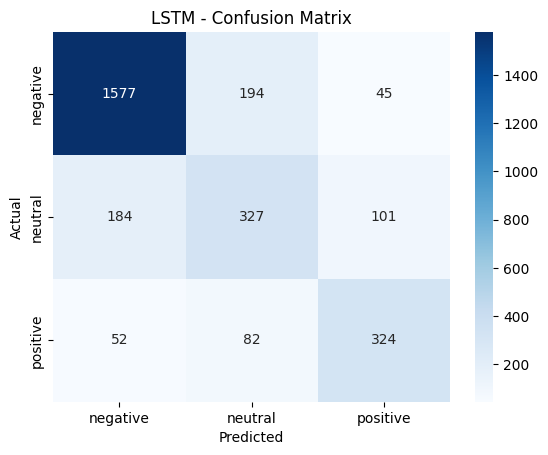

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_dl, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('LSTM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


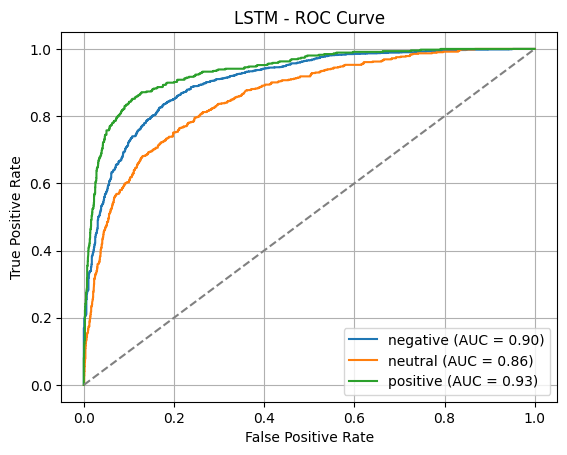

In [ ]:
# ROC Curve
# y_test_bin_dl is correctly using y_test_dl
y_test_bin_dl = label_binarize(y_test_dl, classes=[0, 1, 2])

# We need the predicted probabilities for the ROC curve, which are in y_pred
fpr_dl, tpr_dl, roc_auc_dl = {}, {}, {}
for i in range(3):
    # Use y_test_bin_dl and the predicted probabilities y_pred
    fpr_dl[i], tpr_dl[i], _ = roc_curve(y_test_bin_dl[:, i], y_pred[:, i])
    roc_auc_dl[i] = auc(fpr_dl[i], tpr_dl[i])

plt.figure()
for i, c in enumerate(classes):
    plt.plot(fpr_dl[i], tpr_dl[i], label=f'{c} (AUC = {roc_auc_dl[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('LSTM - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()